This experiment shows the model performance with different downstream model.

In [5]:
import os
import sys

sys.path.append('/home/dwangyang/NIPS2023/IJCAI-AutoFS/code')
print(sys.path)

import pandas as pd

['/home/dwangyang/NIPS2023/IJCAI-AutoFS/code/ours/exps/RQ5:More_Downstream', '/usr/local/anaconda3/lib/python38.zip', '/usr/local/anaconda3/lib/python3.8', '/usr/local/anaconda3/lib/python3.8/lib-dynload', '', '/home/dwangyang/.local/lib/python3.8/site-packages', '/usr/local/anaconda3/lib/python3.8/site-packages', '/home/dwangyang/NIPS2023/IJCAI-AutoFS/code', '/home/dwangyang/NIPS2023/IJCAI-AutoFS/code']


In [6]:
from utils.tools import downstream_task_by_method, downstream_task_by_method_std, downstream_task_by_method_no_k_fold
from feature_env import FeatureEvaluator

MEASUREMENT = {
    'cls': ['Precision', 'Recall', 'F1score', 'ROC/AUC'],
    'reg': ['MAE', 'MSE', 'RAE', 'RMSE'],
    'det': ['MAP', 'F1score', 'RAS', 'Recall']
}
cols = [
	'RF', 'XGB', 'SVM', 'KNN', 'DT'
]
base_path = '/home/dwangyang/NIPS2023/IJCAI-AutoFS/data/history'
baseline = {'Raw':'raw', 'K-Best':'kbest', 'mRMR':'mrmr', 'LASSO':'lasso', 'RFE':'rfe', 'LASSONet':'lassonet', 'GFS':'gfs', 'SARLFS':'sarlfs', 'MARLFS':'marlfs', 'MCDM':'mcdm', 'Ours': 'our'}

def report_performance(method, selection_method, fe, std=False):
	if selection_method == 'our':
		file = f'{base_path}/{fe.task_name}/best-ours-test.hdf'
		ds_ours = pd.read_hdf(file, key=f'train')
		return downstream_task_by_method_no_k_fold(ds_ours, fe.task_type, method)
	else:
		file = f'{base_path}/{fe.task_name}.hdf'
		ds_ours = pd.read_hdf(file, key=f'{selection_method}_train')
		if std:
			return downstream_task_by_method_std(ds_ours, fe.task_type, method)
		return downstream_task_by_method(ds_ours, fe.task_type, method)

def show_and_out(name, std=False):
	ps = []
	fe = FeatureEvaluator(name)
	for method in cols:
		p = []
		for _, v in baseline.items():
			if std:
				ours, std = report_performance(method, v, fe, std)
				p.append([std, ours])
			else:
				ours = report_performance(method, v, fe)
				p.append(ours)
		ps.append(p)
	print(name)
	p_table = pd.DataFrame(ps)
	p_table.columns = list(baseline.keys())
	p_table.index = cols
	print(p_table)
	if std:
		p_table.to_csv(f'/home/dwangyang/NIPS2023/IJCAI-AutoFS/code/ours/exps/RQ5:More_Downstream/out/{name}_std.csv')
	else:
		p_table.to_csv(f'/home/dwangyang/NIPS2023/IJCAI-AutoFS/code/ours/exps/RQ5:More_Downstream/out/{name}.csv')
	return p_table

In [ ]:
# for task_name in [
#         'spectf', 'svmguide3', 'german_credit', 'uci_credit_card', 'spam_base', 'megawatt1','ionosphere', 'activity',
#                       'mice_protein', 'coil-20', 'minist', 'minist_fashion',
#                       'openml_586', 'openml_589', 'openml_607', 'openml_616','openml_618','openml_620','openml_637']:
# 	df = pd.read_hdf(f'{base_path}/mcdm_train.hdf', key=f'{task_name}')
# 	df.to_hdf(f'{base_path}/{task_name}.hdf', key=f'mcdm_train')
# 	df = pd.read_hdf(f'{base_path}/mcdm_test.hdf', key=f'{task_name}')
# 	df.to_hdf(f'{base_path}/{task_name}.hdf', key=f'mcdm_test')
# 	df = pd.read_hdf(f'{base_path}/rra_train.hdf', key=f'{task_name}')
# 	df.to_hdf(f'{base_path}/{task_name}.hdf', key=f'rra_train')
# 	df = pd.read_hdf(f'{base_path}/rra_test.hdf', key=f'{task_name}')
# 	df.to_hdf(f'{base_path}/{task_name}.hdf', key=f'rra_test')

In [ ]:
# import tables as tb
# for task_name in [
#         'spectf', 'svmguide3', 'german_credit', 'uci_credit_card', 'spam_base', 'megawatt1','ionosphere', 'activity',
#                       'mice_protein', 'coil-20', 'minist', 'minist_fashion',
#                       'openml_586', 'openml_589', 'openml_607', 'openml_616','openml_618','openml_620','openml_637']:
#     with tb.open_file(f'{base_path}/{task_name}.hdf', mode='a') as store:
# 	    store.remove_node(where='/train_mcdm', recursive=True)
# 	    store.remove_node(where='/test_mcdm', recursive=True)
# 	    store.remove_node(where='/train_rra', recursive=True)
# 	    store.remove_node(where='/test_rra', recursive=True)

In [7]:
import warnings
warnings.filterwarnings("ignore")
result = dict()
# for id, i in enumerate(['spectf', 'svmguide3', 'german_credit', 'spam_base',
#               'ionosphere', 'megawatt1', 'uci_credit_card',
#                                          'openml_618', 'openml_589', 'openml_616', 'openml_607', 'openml_620',
#               'openml_637',
#               'openml_586']):
for id, i in enumerate(['svmguide3']):
    result[i] = show_and_out(i, False)

INFO:  initialize the train and test dataset
svmguide3
          Raw    K-Best      mRMR     LASSO       RFE  LASSONet       GFS  \
RF   0.833213  0.800963  0.799170  0.780521  0.830555  0.779332  0.824754   
XGB  0.842145  0.802271  0.788392  0.783212  0.827790  0.801332  0.828077   
SVM  0.775643  0.748538  0.756329  0.758987  0.767486  0.733866  0.746219   
KNN  0.810583  0.803870  0.808535  0.761113  0.786615  0.749957  0.809243   
DT   0.777850  0.754159  0.741015  0.719945  0.771517  0.738294  0.785798   

       SARLFS    MARLFS      MCDM      Ours  
RF   0.851411  0.840682  0.818354  0.874103  
XGB  0.837897  0.834595  0.808625  0.849810  
SVM  0.740274  0.748375  0.756647  0.774754  
KNN  0.810193  0.818873  0.807667  0.832109  
DT   0.781037  0.796919  0.749975  0.772036  


In [4]:
result

{'svmguide3':           Raw    K-Best      mRMR     LASSO       RFE  LASSONet       GFS  \
 RF   0.833213  0.800963  0.799170  0.780521  0.830555  0.779332  0.824754   
 XGB  0.842145  0.802271  0.788392  0.783212  0.827790  0.801332  0.828077   
 SVM  0.775643  0.748538  0.756329  0.758987  0.767486  0.733866  0.746219   
 KNN  0.810583  0.803870  0.808535  0.761113  0.786615  0.749957  0.809243   
 DT   0.790700  0.764227  0.743069  0.709133  0.762875  0.739722  0.800948   
 
        SARLFS    MARLFS      MCDM      Ours  
 RF   0.851411  0.840682  0.818354  0.874103  
 XGB  0.837897  0.834595  0.808625  0.849810  
 SVM  0.740274  0.748375  0.756647  0.774754  
 KNN  0.810193  0.818873  0.807667  0.832109  
 DT   0.792656  0.787976  0.742386  0.759822  }

In [ ]:
for i in result['svmguide3'].transpose().iterrows():
	strs = []
	for j, name in enumerate(['RF', 'XGB', 'SVM', 'KNN', 'DT']):
		n1 = '%.2f' % (i[1][j][1] * 100)
		n2 = '%.2f' % (i[1][j][0] * 100)
		strs.append(f'{n1}' + '$_{\pm' + f'{n2}'+ '}$')
	print(i[0] + '&' + '&'.join(strs) + '\\\\')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_img(name):
	ds = pd.read_csv(f'/home/dwangyang/NIPS2023/IJCAI-AutoFS/code/ours/exps/RQ5:More_Downstream/out/{name}.csv')
	df = ds.iloc[:, 1:]
	df.index = ds.iloc[:, 0]
	df = df * 100
	plt.figure(dpi=400)
	ax = sns.heatmap(data=df, cmap=plt.get_cmap('Greens_r'),annot=True,fmt='.1f')
	ax.set(xlabel = 'Feature Selection Method', ylabel = 'Downstream Model', title=name)
	plt.show()

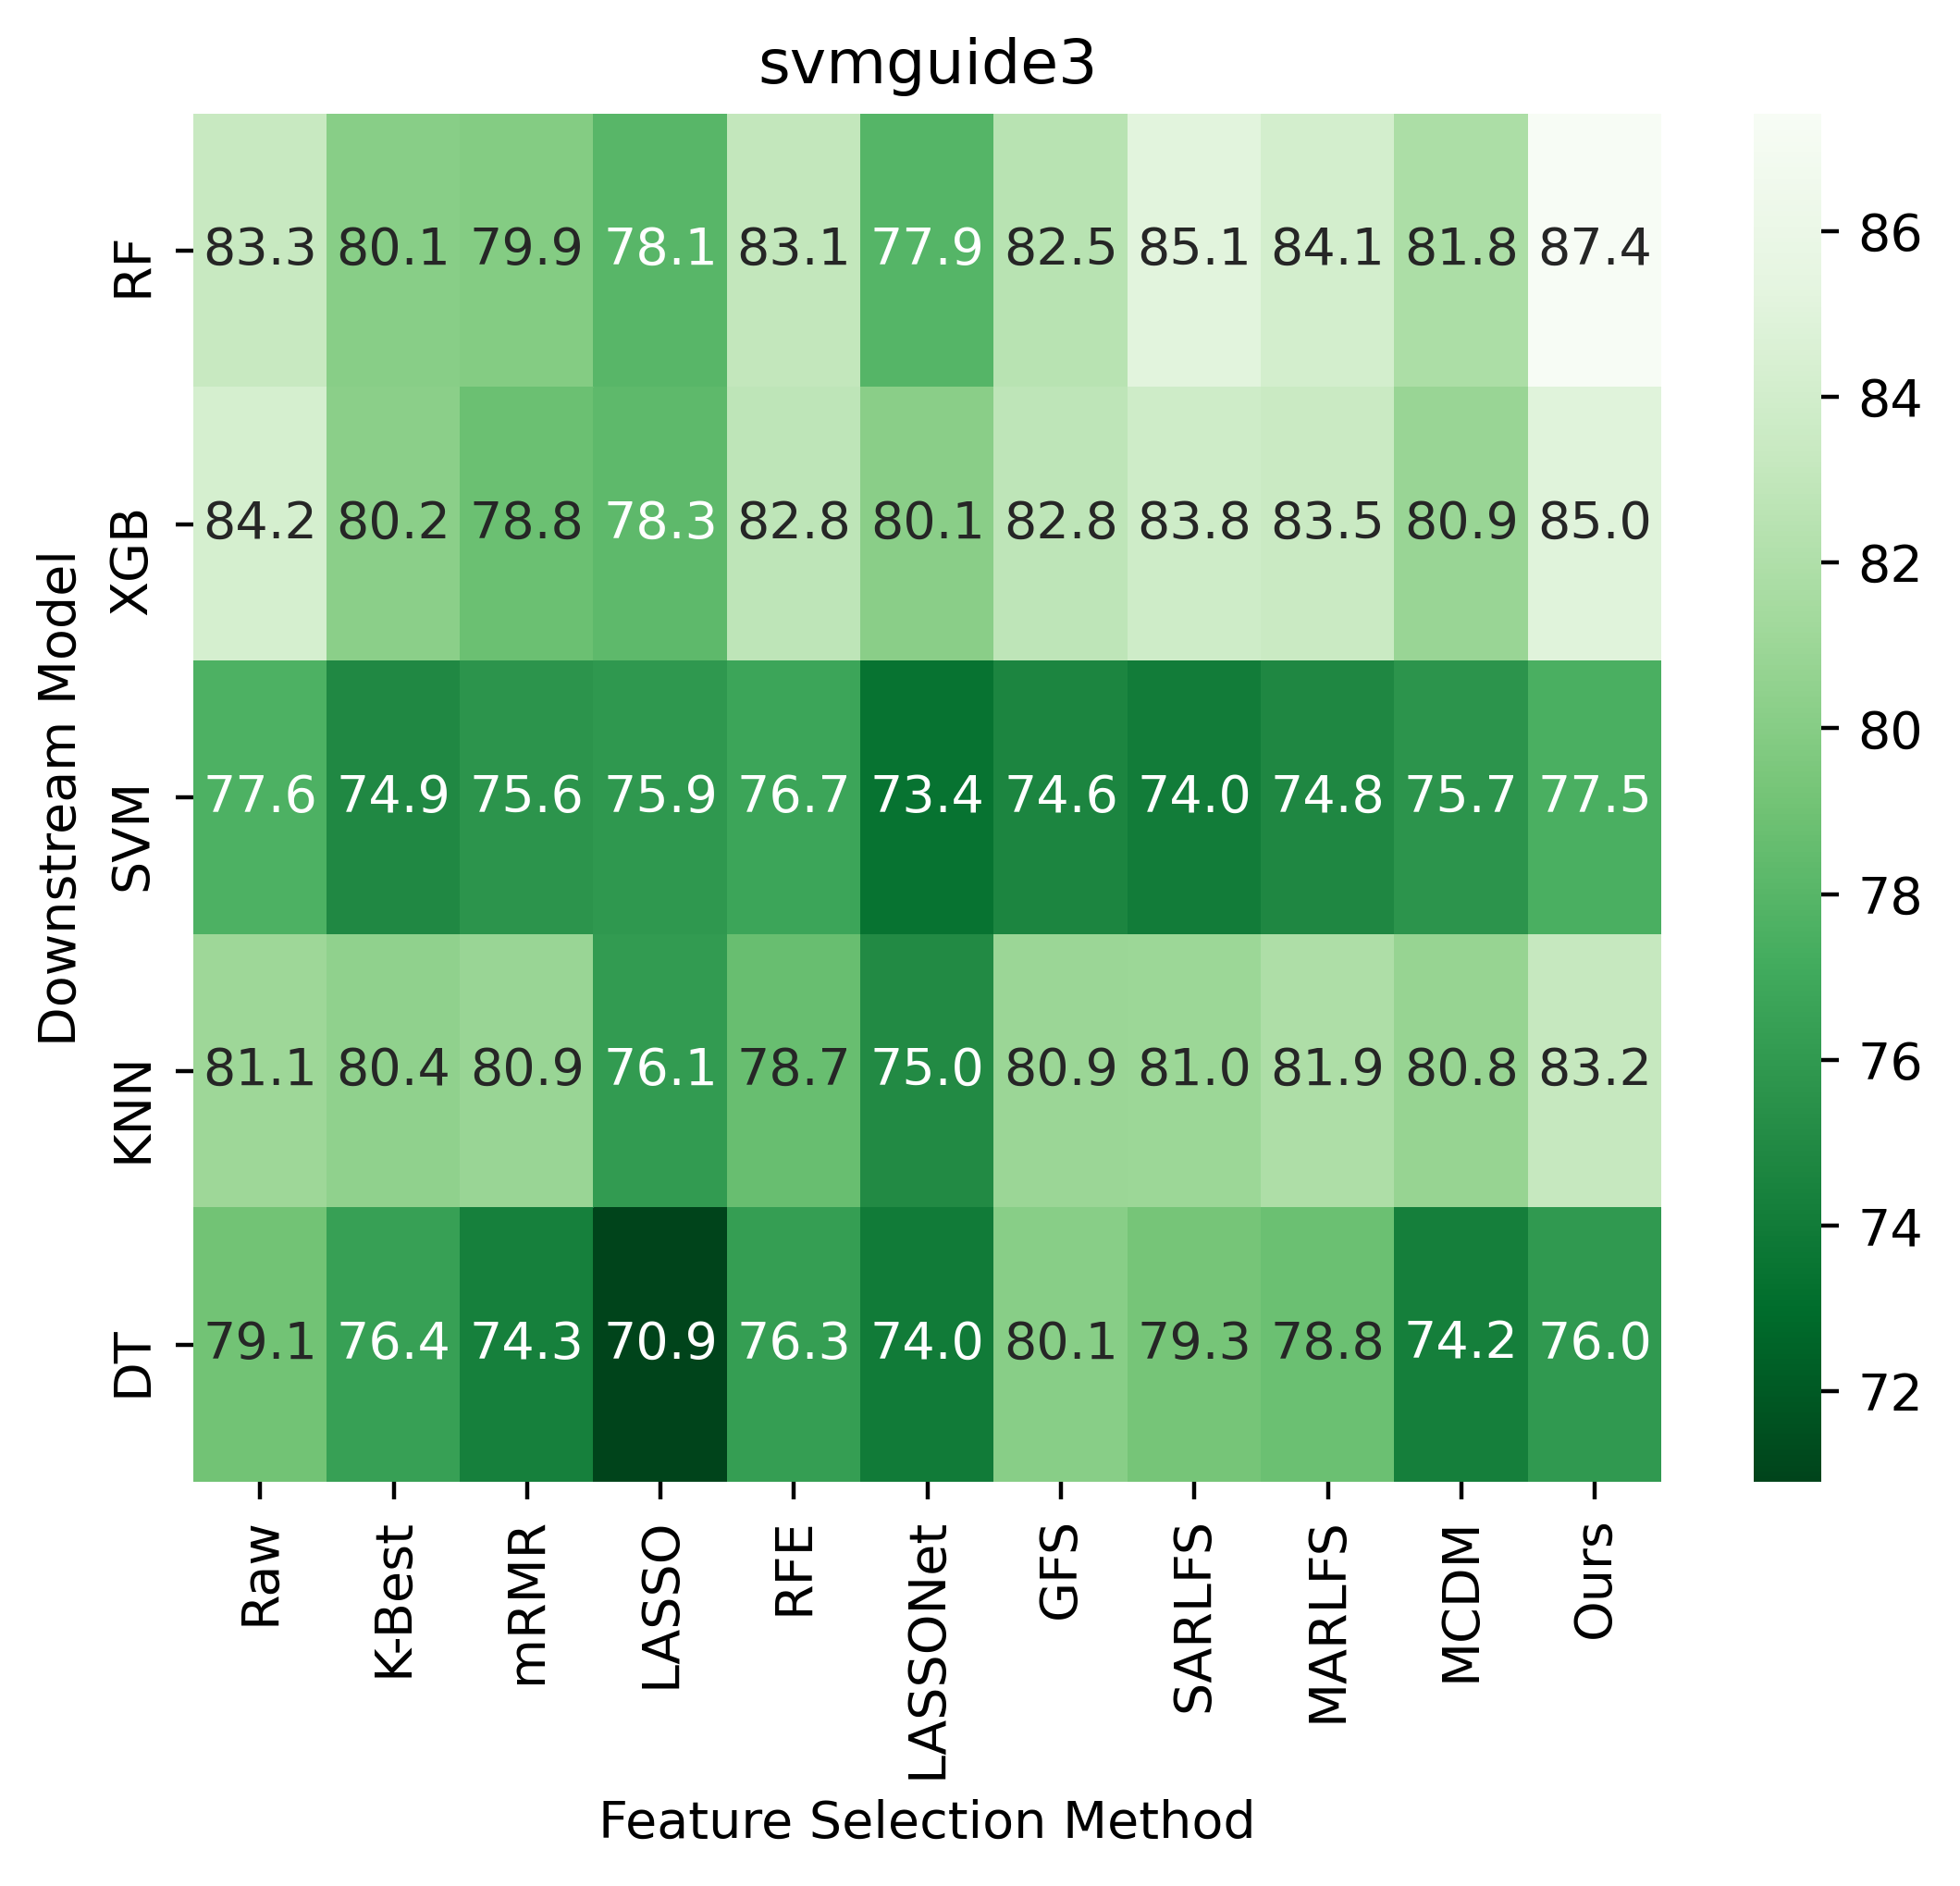

In [6]:
# for id, i in enumerate(['spectf', 'svmguide3', 'german_credit', 'spam_base',
#               'ionosphere', 'megawatt1', 'uci_credit_card',
#                                          'openml_618', 'openml_589', 'openml_616', 'openml_607', 'openml_620',
#               'openml_637',
#               'openml_586']):
for id, i in enumerate(['svmguide3']):
    show_img(i)